In [1]:
import seml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 300

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [36]:
unc_pancreas = seml.get_results('uncertainty_pancreas', to_data_frame=True)
unc_pbmc = seml.get_results('uncertainty_pbmc', to_data_frame=True)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
unc_pancreas = unc_pancreas[[
    'config.holdout',
    'result.distances',
    'result.integration_scores'
]].set_index('config.holdout')

In [28]:
unc_pancreas['closest_dist'] = unc_pancreas['result.distances'].apply(
    lambda x: x['dist'].min()
)
unc_pancreas['closest_study'] = unc_pancreas['result.distances'].apply(
    lambda x: x['condition'].loc[np.argmin(x['dist'])]
)
for score in list(unc_pancreas['result.integration_scores'].iloc[0].columns):
    unc_pancreas[f'intscore.{score}'] = unc_pancreas['result.integration_scores'].apply(
        lambda x: x[score]
    )
unc_pancreas['integration_scores_mean'] = unc_pancreas[
    unc_pancreas.columns[
        unc_pancreas.columns.str.contains('intscore.')
    ]
].mean(axis=1)

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


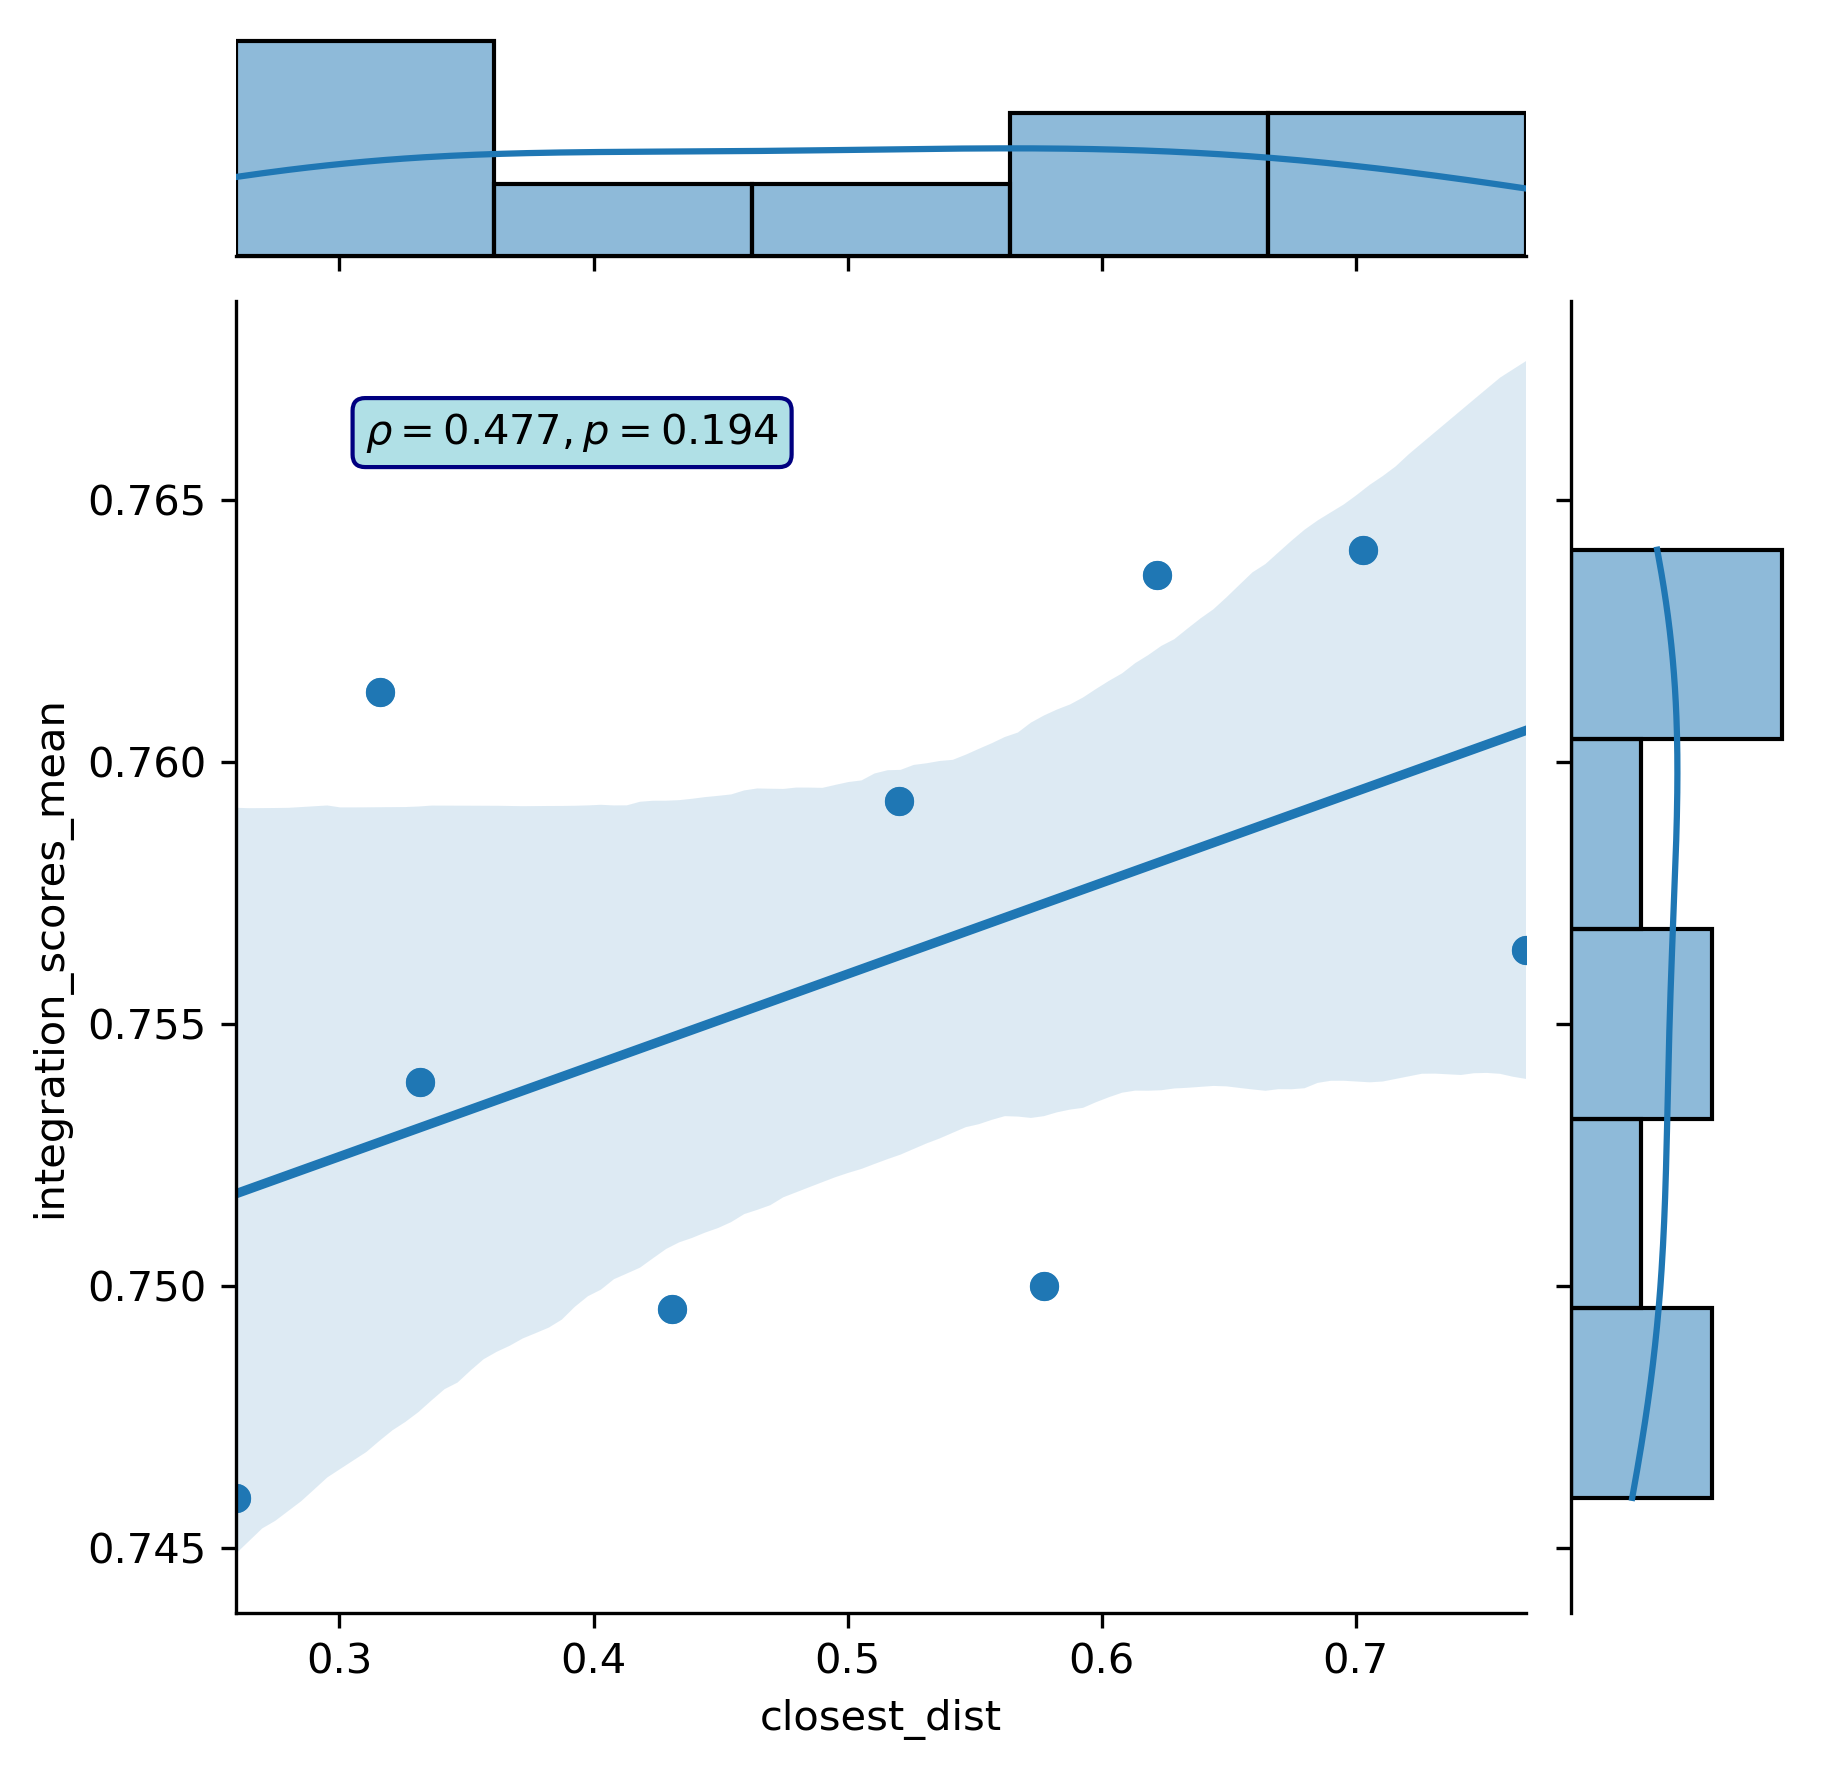

In [35]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
j = sns.jointplot(
    unc_pancreas['closest_dist'], 
    unc_pancreas['integration_scores_mean'],
    kind='reg',
)
r, p = stats.pearsonr(
    unc_pancreas['closest_dist'],
    unc_pancreas['integration_scores_mean']
)
j.ax_joint.annotate(
    f'$\\rho = {r:.3f}, p = {p:.3f}$',
    xy=(0.1, 0.9), 
    xycoords='axes fraction',
    ha='left',
    va='center',
    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'}
)
j.ax_joint.scatter(
    unc_pancreas['closest_dist'],
    unc_pancreas['integration_scores_mean']
)

In [37]:
unc_pbmc = unc_pbmc[[
    'config.holdout',
    'result.distances',
    'result.integration_scores'
]].set_index('config.holdout')

In [38]:
unc_pbmc['closest_dist'] = unc_pbmc['result.distances'].apply(
    lambda x: x['dist'].min()
)
unc_pbmc['closest_study'] = unc_pbmc['result.distances'].apply(
    lambda x: x['condition'].loc[np.argmin(x['dist'])]
)
for score in list(unc_pbmc['result.integration_scores'].iloc[0].columns):
    unc_pbmc[f'intscore.{score}'] = unc_pbmc['result.integration_scores'].apply(
        lambda x: x[score]
    )
unc_pbmc['integration_scores_mean'] = unc_pbmc[
    unc_pbmc.columns[
        unc_pbmc.columns.str.contains('intscore.')
    ]
].mean(axis=1)

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


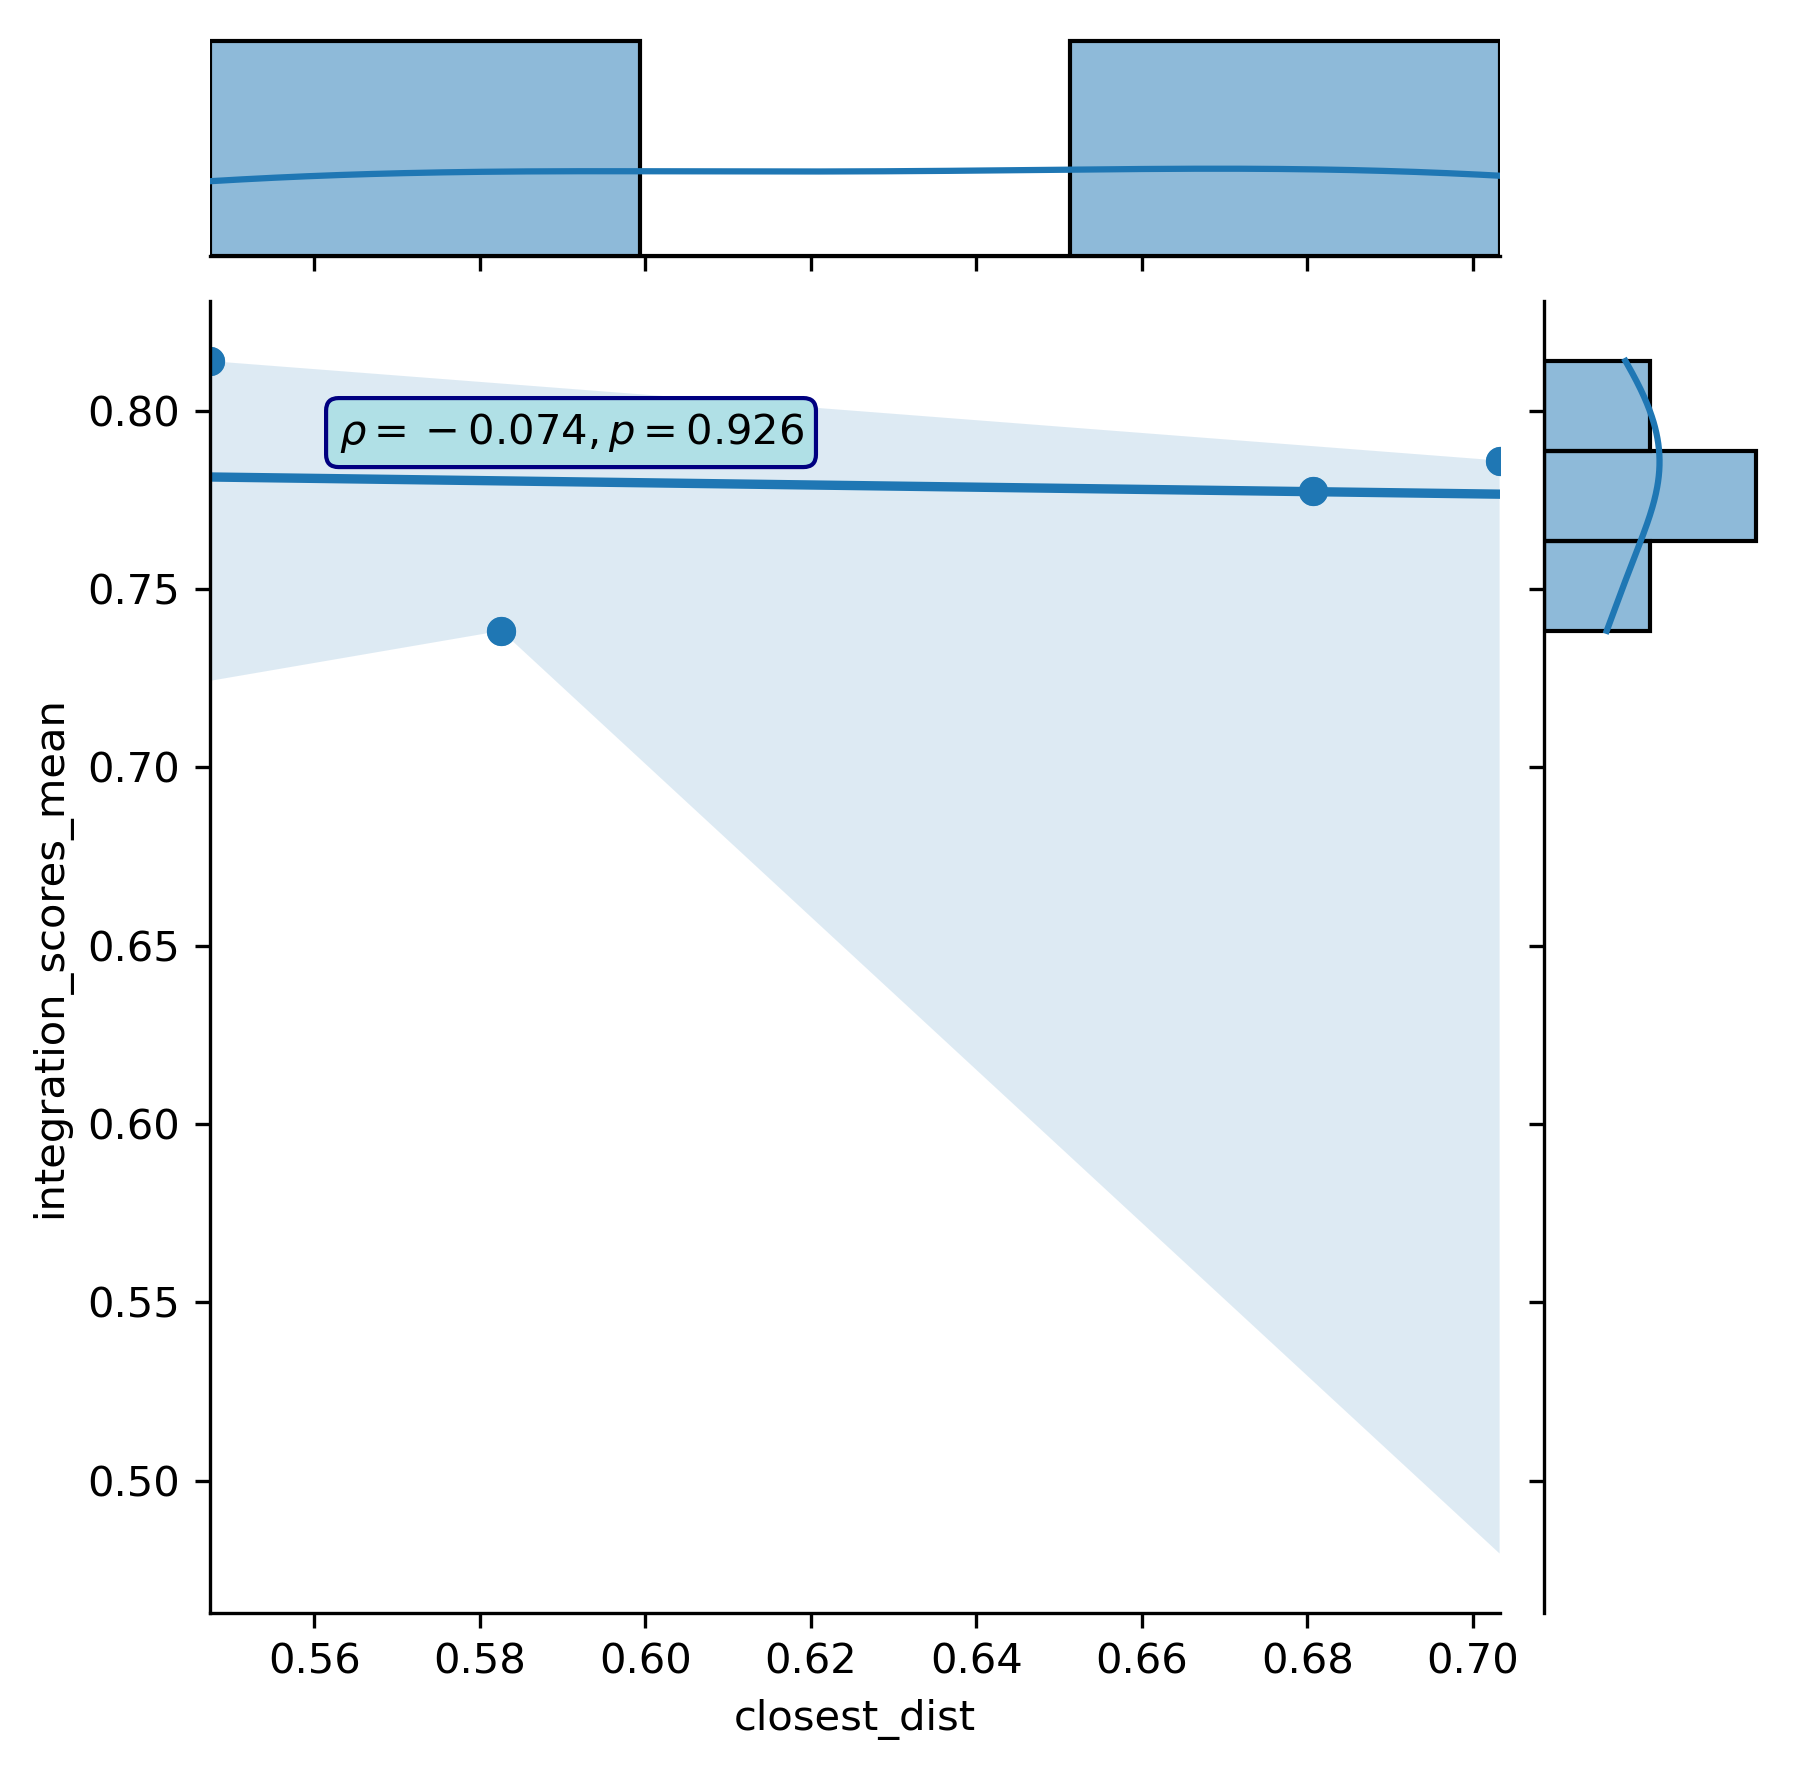

In [39]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
j = sns.jointplot(
    unc_pbmc['closest_dist'], 
    unc_pbmc['integration_scores_mean'],
    kind='reg',
)
r, p = stats.pearsonr(
    unc_pbmc['closest_dist'],
    unc_pbmc['integration_scores_mean']
)
j.ax_joint.annotate(
    f'$\\rho = {r:.3f}, p = {p:.3f}$',
    xy=(0.1, 0.9), 
    xycoords='axes fraction',
    ha='left',
    va='center',
    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'}
)
j.ax_joint.scatter(
    unc_pbmc['closest_dist'],
    unc_pbmc['integration_scores_mean']
)